# ECE 466 Homework 3
---
__Spring 22__
__Due 2/17/2022__

* You have 10 extra points. I will carry your points over the other homeworks as well. So, if you score 105 in this homework, I will add 0.5 points to your total homework score for the whole semester.
* You can solve the question by paper and pen and [embed an image](https://www.markdowntutorial.com/lesson/4/) in the markdown cell. Make sure that the image is legible in the output `.html` file.
* You can collaborate on homeworks and turn in a homework for 2 people. Make sure both of you submit.
* Include your codes and answers within the cells that are requested. Do not create additional cells. 
* __Upload the `.ipynb` document and a generated `.html` in a zip:__  

> I will import the necessary modules for you. Please only use these modules for now. 

**Your Name: [Name Surname]**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#### 1:

[20] Determine the z-transform of the following signals and define the ROC. 

1. $x[n] = \{3,0,0,0,\underline{6},1,-4\}$
2. $x[n] = -n(-1)^n u(n-1)$
3. $x[n] = (-1)^n\cos(\frac{\pi}{3}n)$
4. $x[n] = (\frac{1}{2})^n(u(n)-u(n-10))$


__Answers for 1:__

1. $X(z) = 3z^{4}+6+z^{-1}-4z^{-2}$. ROC: Everywhere except $z=0$ and $z=\infty$
2. We will use the shift, and the derivative of $z$-transform properties of $z$-transform: 
   - Let $ x_1[n] = (-1)^{n-1}u[n-1]$. Then $X(z)=-z\frac{\delta X_1(z)}{\delta z}$. 
   - Let $ x_2[n] = (-1)^{n}u[n]$. Then $X_1(z) = z^{-1}X_2(z) = \frac{z^{-1}}{1+z^{-1}}$. 
   - Thus, $X(z) = -z \frac{\delta (\frac{1}{1+z})}{\delta z} = -z \frac{-1}{(1+z)^2}=\frac{z}{(1+z)^2}$. 
   - There are two poles at $z=-1$ and the signal is causal. Thus, ROC: $|z|>1$.

3. We can rewrite $x[n]$ by representing $(-1)^n$, equivalently, as $\cos(\pi n)$:
   $$\begin{align*} x[n] &= \cos(\pi n) \cos(\pi/3 n) \\ &= \frac{1}{2}(\cos(\frac{2\pi}{3}n)+\cos(\frac{4\pi}{3}n)) \\ &= \frac{1}{2}(\cos(\frac{2\pi}{3}n)+\cos(\frac{4\pi}{3}n-2\pi n))\\ &= \frac{1}{2}(\cos(\frac{2\pi}{3}n)+\cos(-\frac{2\pi}{3}n))\\ &= \cos(\frac{2\pi}{3}n).\end{align*}$$
   
   Then, from the $z$-transform of cosine signals $X(z) = \frac{2-2\cos(\frac{2\pi}{3})z^{-1}}{1-2\cos(\frac{2\pi}{3}z^{-1}+z^{-2})}$. As the signal is the addition of causal and anticausal cosines with same poles, the ROC doesn't have any intersection. So, ROC does not exist. 
   
   (_For this question I will give full credit to those who assumed there is a unit step sequence in the formula of $x$, i.e. $x[n]=(-1)^n\cos(\frac{\pi}{3}n)u[n]$. Still, the only difference in between having the step function and not having it is that we add two cosines, one causal and one anticausal. Thus, their $z$-transform is the same but ROC is reversed._)
3. $x[n] = (\frac{1}{2})^nu[n] - (\frac{1}{2})^{10}(\frac{1}{2})^{n-10} u[n-10]$. Then, 
   $$\begin{align*} X(z) &= \frac{1}{1-\frac{1}{2}z^{-1}}-\frac{(\frac{1}{2})^{10} z^{-10}}{1-\frac{1}{2}z^{-1}} \\ &= \frac{1-(\frac{1}{2}z^{-1})^{10}}{1-\frac{1}{2}z^{-1}} \\ &= \frac{(1-\frac{1}{2}z^{-1})(1+\frac{1}{2}z^{-1}+\frac{1}{4}z^{-2}+\dots+\frac{1}{512}z^{-9})}{1-\frac{1}{2}z^{-1}} \\ &= 1+\frac{1}{2}z^{-1}+\frac{1}{4}z^{-2}+\dots+\frac{1}{512}z^{-9}.
   \end{align*}$$ 
   ROC: everywhere except $z=0$. (_Be careful about the pole-zero cancellation._)

---

#### 2:

[20] Consider the recursive discrete-time system described by the difference equation:
$$ y[n] = -a_1y[n-1]-a_2y[n-2]+b_0x[n],$$
where $a_1 = -0.8$, $a_2=0.64$, and $b_0=0.866$.  (_Hint: Check out [lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html?highlight=filter#scipy.signal.lfilter), [dimpulse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html#scipy.signal.dimpulse), and [convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)_)


1. Write a code to compute and plot the impulse response $h[n]$ of the system for $0\leq n \leq 49$.
2. Write a code to compute and plot the zero-state step response $s[n]$ of the system for $0 \leq n \leq 99$.
3. Define an FIR system with impulse response $h_{FIR}[n]$ given by 
   
    $h_{FIR}[n] = \begin{cases}h[n], \quad&0\leq n \leq 19\\0, &\text{otherwise.}\end{cases}$

    where $h[n]$ is the impulse response computed in part (1). Write a code to compute and plot its step response.
4. Compare the results obtained in parts (2) and (3) and explain their similarities and differences.

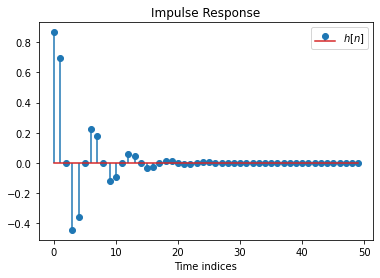

In [3]:
# Your code for 2.1 should be written and executed in this cell.
system = signal.dlti([0.866,0,0],[1,-0.8, 0.64]) 
# Check the coefficients of the numerator. This comes from the system transfer function. 
# You can also use the zeros/poles/gain of the system. 
inds, imp_resp = signal.dimpulse(system, t=np.arange(50)) 
plt.stem(inds, imp_resp[0], label='$h[n]$')
plt.xlabel('Time indices')
plt.title('Impulse Response')
plt.legend()
plt.show()

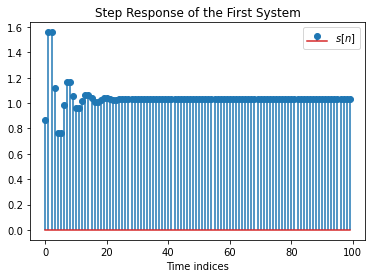

In [4]:
# Your code for 2.2 should be written and executed in this cell.
inds, step_resp = signal.dstep(system, t=np.arange(100))
step_resp = step_resp[0].flatten()
plt.stem(inds, step_resp, label='$s[n]$')
plt.xlabel('Time indices')
plt.title('Step Response of the First System')
plt.legend()
plt.show()

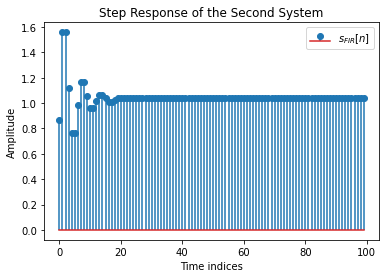

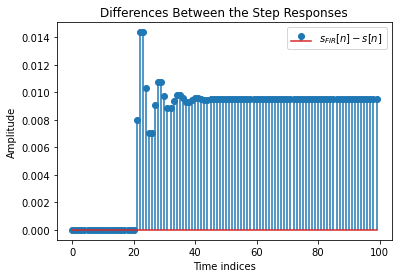

In [5]:
# Your code for 2.3 should be written and executed in this cell.
imp_resp_2 = imp_resp[0][:20].flatten()
step = np.ones(120)
step_resp_2 = np.convolve(imp_resp_2, step)

plt.stem(step_resp_2[:100], label='$s_{FIR}[n]$')
plt.legend()
plt.xlabel('Time indices')
plt.ylabel('Amplitude')
plt.title('Step Response of the Second System')
plt.show()

plt.stem(step_resp_2[:100]-step_resp, label='$s_{FIR}[n]-s[n]$')
plt.legend()
plt.xlabel('Time indices')
plt.ylabel('Amplitude')
plt.title('Differences Between the Step Responses')
plt.show()

__Answer for 2.4:__

There is a slight change in the response of the second system that takes into effect after 20 points of filtering. This makes sense as the filter is identical before that point. This shows us that although differences of IIR and FIR systems might look negligable, it can create a persistent effect.

---

#### 3:

[20] Determine the z-transforms of the following signals and describe the pole-zero patterns and ROC. You can use the properties of z-transform. 

1. $x[n] = (n+1)u[n]$.

__Answer for 3.1__:

This signal is the linear combination of $nu[n]$ and $u[n]$ signals. The second one has z-transform $\frac{1}{1-z^{-1}}$ as $u[n]=1^nu[n]$ . From the derivative of $z$ transform property, the $z$ transform of the first component is $-z\frac{\delta (\frac{1}{1-z^{-1}})}{\delta z} = \frac{z^{-1}}{(1-z^{-1})^2}$. Then, we have: 
$$ X(z) = \frac{z^{-1}}{(1-z^{-1})^2}+ \frac{1}{1-z^{-1}} = \frac{1-z^{-1}+z^{-1}}{(1-z^{-1})^2}=\frac{z^2}{(z-1)^2}.$$

There are two poles at $z = 1$ and two zeros at $z=0$. ROC is: $|z|>1$.

---

2. $x[n] = \begin{cases} (\frac{1}{3})^n, \quad & n\geq 0 \\ (\frac{1}{2})^{-n}, & n <0  \end{cases}$.

__Answer for 3.2:__

This is again a linear combination of two signals, one causal and one anticausal. The expression is equivalently written as $$ x[n] = (\frac{1}{3})^nu[n]+2^nu[-n-1]).$$ Thus, the $z$ transform is $X(z) = \frac{1}{1-\frac{1}{3}z^{-1}}-\frac{1}{1-2z^{-1}} = \frac{1-2z^{-1}-1+\frac{1}{3}z^{-1}}{(1-2z^{-1})(1-\frac{1}{3}z^{-1})}=\frac{-\frac{5}{3}z}{(z-2)(z-\frac{1}{3})}$. There are two poles at $z=2$ and $z=\frac{1}{3}$, and one zero at $z=0$. Since the signal causing the outer pole is anti-causal (and vice versa), ROC is: $\frac{1}{3}<|z|<2$.

---

3. $x[n] = (\frac{1}{4})^n(u[n]-u[n-5])$.

__Answer for 3.3:__

$X(z) = 1 + \frac{1}{4} z^{-1} + \frac{1}{16} z^{-2} + \frac{1}{64} z^{-3} + \frac{1}{256} z^{-4}$. There are 4 poles only at $z=0$. ROC is the entire $z$ plane except $z=0$. Check 1.4 for another solution.

---

4. $x[n] = (\frac{1}{2})^nu[n] \ast 2^n u[n-1]$.

__Answers for 3.4:__

Convolution in time is multiplication in $z$ transform. The signal to the left of convolution has $z$ transform $\frac{z}{z-\frac{1}{2}}$. The one on the right is a shifted signal $2.2^{n-1}u[n-1]$, so it has $z$ transform $2z^{-1}\frac{z}{z-2}$. Hence, $X(z) = \frac{2z}{(z-\frac{1}{2})(z-2)}$. There are two poles at $z=0.5$ and $z=2$, and a zero at $z=0$. ROC is $|z|>2$.

---

5. $x[n] = n\sin(\frac{\pi}{2}n)u[-n]$.

__Answers for 3.5:__

From $z$ transform table:
$$\sin(\frac{\pi}{2}n)u[n] \leftrightarrow \frac{z^{-1}\sin(\frac{pi}{2})}{1-2z^{-1}\cos(\frac{\pi}{2})+z^{-2}}=\frac{z^{-1}}{1+z^{-2}}$$
From time reversal property
$$\sin(-\frac{\pi}{2}n)u[-n]=-\sin(\frac{\pi}{2}n)u[-n] \leftrightarrow \frac{z}{1+z^{2}}$$
From derivative property
$$n\sin(\frac{\pi}{2}n)u[-n] \leftrightarrow{} -z\frac{\delta \frac{z}{1+z^{2}}}{\delta z} = -z(\frac{1}{1+z^2}-\frac{2z^2}{(1+z^{2})^2})=\frac{z(z^2-1)}{(1+z^{2})^2}.$$

There are two poles at $z=j$ and $z=-j$. There are zeros at $z=0$, $z=1$ and $z=-1$. The ROC is $|z|<1$ as the signal is anticausal.

---

#### 4:
[20] Given the z-transform pair $n^23^nu[n]\leftrightarrow X(z)$, use the z-transform properties 
to determine the time domain signals corresponding to the following z transforms: 

1. $Y(z) = X(2z)$

__Answer for 4.1:__

Scaling in time domain with $a^{-1} = 2$. Then, $y[n] = (\frac{1}{2})^nn^23^nu[n]$

---

2. $Y(z) = \frac{z^2-z^{-2}}{2}X(z)$

__Answer for 4.2:__

Shift in time both in positive and negative directions. Then, $y[n] = \frac{(n+2)^23^{n+2}u[n+2]-(n-2)^23^{n-2}u[n-2]}{2}.$

---

3. $Y(z) = \frac{\delta X(z)}{\delta z}$

__Answers for 4.3:__

Both derivative and time shift should be used as $Y(z) = -z^{-1}(-z\frac{\delta X(z)}{\delta z})$. Then, $$y[n] = -(n-1)x[n-1] = -(n-1)^33^{n-1}u[n-1].$$

---

4. $Y(z) = X(z^{-1})$

__Answer for 4.4:__

Time reversal. $y[n] = x[-n] = n^23^{-n}u[-n]$

---

#### 5:  
[10]
Compute the time domain signals with the z-transform described by: 

1. $X(z) = \frac{1}{1-z^{-1}+\frac{1}{2}z^{-2}}$.

__Answer for 5.1:__

$$
\begin{align*}
X(z) &= \frac{z^2}{z^2-z+\frac{1}{2}} \\ 
\frac{X(z)}{z} &= \frac{z}{(z-0.5-j0.5)(z-0.5+j0.5)}\\
&= \frac{A_1}{z-0.5-j0.5}+\frac{A_1^*}{z-0.5+j0.5} \\
\end{align*}
$$ 

- Two poles at $p_1= 0.5-j0.5$ and $p_1^* = 0.5+j0.5$. 
- $|p_1|=|p_1^*|=\sqrt{\frac{1}{2}}$.
- $(A_1+A_1^*)z = 2\text{Re}(A_1)z = 1$, then $\text{Re}(A_1)=0.5.$
- $-0.5(A_1+A_1^*)+j0.5(A_1-A_1^*) = -\text{Re}(A_1)-\text{Im}(A_1) = 0$. Then, $\text{Im}(A_1) = -0.5.$
- $A_1 = 0.5 - j0.5$.
$$
\begin{align*}
x[n] &= (0.5-j0.5) (0.5+j0.5)^nu[n] + (0.5+j0.5)(0.5-j0.5)^nu[n] \\ 
&= \left(\sqrt{\frac{1}{2}}\right)^n \left( 0.5 (e^{j\frac{\pi}{4}n}+e^{-j\frac{\pi}{4}n}) -j0.5( e^{j\frac{\pi}{4}n}- e^{-j\frac{\pi}{4}n} )\right)u[n] \\ 
&= \left(\sqrt{\frac{1}{2}}\right)^n \left(\cos(\frac{\pi}{4}n)+\sin(\frac{\pi}{4}n)\right)u[n] \\
&= \left(\sqrt{\frac{1}{2}}\right)^n \left(\cos(\frac{\pi}{4}n)+\cos(\frac{\pi}{2}-\frac{\pi}{4}n)\right)u[n]\\
&= \left(\sqrt{\frac{1}{2}}\right)^n 2\cos(\frac{\pi}{4})\cos(\frac{\pi}{4}n-\frac{\pi}{4})u[n]\\
&= \frac{2}{\sqrt{2}}\left(\sqrt{\frac{1}{2}}\right)^n\cos(\frac{\pi}{4}n-\frac{\pi}{4})u[n]
\end{align*}
$$

---

2. $X(z) = \frac{5z^{-1}}{(1-2z^{-1})(3-z^{-1})}$.

__Answer for 5.2:__

- $\frac{X(z)}{z} = \frac{5}{(z-2)(3z-1)} = \frac{A_1}{z-2}+\frac{A_2}{3z-1} = \frac{(3A_1 +A_2) z - (A_1+2A_2)}{(z-2)(3z-1)}$. 

- Then, $A_1 = -A_2/3$, $A_1=1$, $A_2 = -3$. 

- Then, $X(z) = \frac{z}{z-2}-3\frac{z}{3z-1}=\frac{z}{z-2}-\frac{z}{z-\frac{1}{3}}$

$x[n] = 2^n u[n] - (\frac{1}{3})^{n}u[n]$.

---

#### 6:
[20] A causal discrete-time system is implemented using the difference equation:
$$y[n] = 0.2 y[n-1] + x[n] + 0.5 x[n-1]$$

1. Find the system function $H(z)$.

__Answer for question 6.1:__

$H(z) = \frac{1+0.5z^{-1}}{1-0.2z^{-1}}$

---


2. Determine the pole-zero patterns using `scipy.signal`. Comment on the stability of the system. 

In [6]:
# Your code for 6.2 should be written and executed in this cell.
z, p, k = signal.tf2zpk([1, 0.5], [1, -0.2])
signal.dlti(z,p,k,dt=1)
print('Zeros: {}'.format(z[0]))
print('Poles: {}'.format(p[0]))
print('Gain: {}'.format(k))

Zeros: -0.5
Poles: 0.2
Gain: 1.0


__Answers for question 6.2:__

The system is BIBO stable as the pole is inside the unit circle.

---

3. What is the impulse response of this system, $h[n]$? Verify $h[n]$ using `impulse` in `scipy.signal` for the first ten time points.

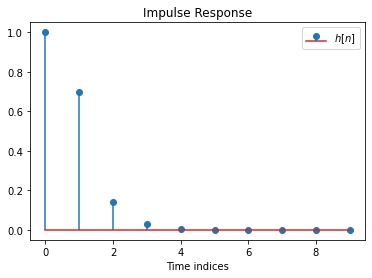

In [7]:
# Your code for 6.3 should be written and executed in this cell.
my_sys = signal.dlti([-0.5], [0.2], 1, 1)
_, h = signal.dimpulse(([1,0.5],[1,-0.2],1), n=10)
plt.stem(h[0].flatten(), label='$h[n]$')
plt.legend()
plt.xlabel('Time indices')
plt.title('Impulse Response')
plt.show()

__Answers for question 6.3:__

$$H(z) = \frac{z+0.5}{z-0.2} = \frac{z}{z-0.2}+\frac{0.5}{z-0.2}$$

Then, $h[n] = (0.2)^nu[n] + 0.5 (0.2)^{n-1}u[n-1]$.

---

4. Find the zero-state response of the system to the input signal $𝑥[𝑛] = (\frac{1}{3})^n𝑢[𝑛]$.
What is the steady-state response of the system? Verify your answer using `lfilter`. (_Hint: Use z-transforms to solve the problem._)

Text(0, 0.5, 'Amplitude')

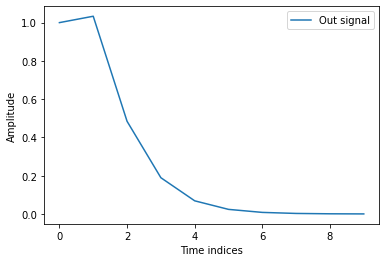

In [9]:
# Your code for 6.4 should be written and executed in this cell.

n = np.arange(12)
x = (1/3)**n

y = signal.lfilter([1,0.5],[1,-0.2],x)

plt.plot(y[:10], label='Out signal')
plt.xlabel('Time indices')
plt.legend()
plt.ylabel('Amplitude')

__Answers for question 6.4:__

- $Y(z) = H(z)X(z) = \frac{z+0.5}{z-0.2}\frac{z}{z-\frac{1}{3}}$
- $\frac{Y(z)}{z} = \frac{z+0.5}{(z-0.2)(z-\frac{1}{3})} = \frac{A_1}{z-0.2}+\frac{A_2}{z-\frac{1}{3}}$

- Then, $A_1+A_2=1$, and $\frac{A_1}{3}+\frac{A_2}{5} = -0.5$. $5A_1 +3A_2 = -7.5$. $2A_1 = -10.5$. 

- Thus, $A_1 = -5.25$ and $A_2 = 6.25$.
- Thus, $Y(z) = -5.25\frac{z}{z-0.2}+6.25\frac{z}{z-\frac{1}{3}}$

- Finally, $y[n] = -5.25 (0.2)^{n}u[n] + 6.25 (\frac{1}{3})^{n-1}u[n-1].$ Thus, the steady state response of the system is, $y_{ss}[n] = \lim_{n\rightarrow \infty} y[n] = 0$.

Another way of representing $y[n]$ is, $y[n] = \{\underline{1}, 1.03, 0.4844, 0.189, ...\}$.

---